In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test  = tf.keras.utils.normalize(x_test,axis=1)

# Model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train,y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2629 - accuracy: 0.9241
Epoch 2/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1076 - accuracy: 0.9672
Epoch 3/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0728 - accuracy: 0.9767
Epoch 4/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0533 - accuracy: 0.9830


# Evaluation

In [7]:
loss, accuracy= model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 0s 893us/step - loss: 0.0879 - accuracy: 0.9728
0.08791226148605347
0.9728000164031982


# Testing

In [8]:
image_number = 1
img = cv2.imread("7.png", cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
img = cv2.resize(img, (28, 28))  # Resize the image to match the model's input shape
img = np.expand_dims(img, axis=0)  # Add an extra dimension to match the batch size
img = tf.keras.utils.normalize(img, axis=1)  # Normalize the image data

prediction = model.predict(img)
predicted_label = np.argmax(prediction[0])

print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 91ms/step
Predicted label: 7


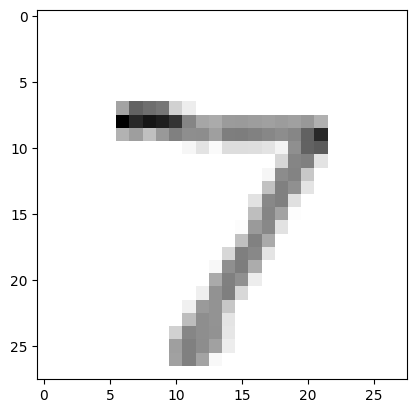

In [9]:
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()